In [1]:
import torch, pandas as pd, os
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
from DQN.agent_eval import head_to_head, plot_winrate_bar
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
A = "Connect4 DQN model.pt"
B = "MIXED0 DQN model.pt"
#B = "RANDOM XVI DQN model.pt"

res = head_to_head(
    A, B,
    n_games=1013, 
    device=device,
    epsilon=0.0,       # no ε during eval
    guard_prob=0.0,    # guard OFF (pure Q)
    opening_noise_k=1, # you can set 1–2 if you want more variety
    seed=666,
    progress=True
)

[load] missing=0, unexpected=0
[load] matched params: 14/14
[load] missing=0, unexpected=0
[load] matched params: 14/14


MIXED0 model.pt vs RANDOM XVI DQN model.pt: 100%|██████████| 1013/1013 [03:41<00:00,  4.58it/s, D=0, L=435, W=578, score=0.571]


In [4]:
pprint(res)
print(f"\nA score = {res['A_score_rate']:.3f}  (95% CI {res['A_score_CI95'][0]:.3f}–{res['A_score_CI95'][1]:.3f})")

{'A_losses': 435,
 'A_path': 'MIXED0 model.pt',
 'A_score_CI95': (0.5400848808575629, 0.6010799760032466),
 'A_score_rate': 0.5705824284304047,
 'A_wins': 578,
 'B_path': 'RANDOM XVI DQN model.pt',
 'draws': 0,
 'games': 1013}

A score = 0.571  (95% CI 0.540–0.601)


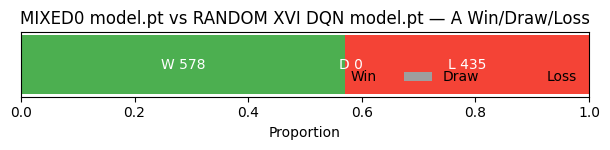

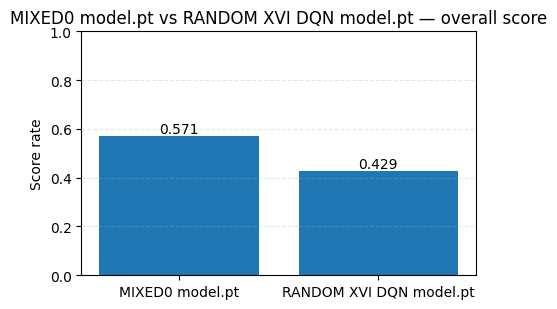

In [5]:
plot_winrate_bar(res)